### importing necessary packages:

In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.metrics import accuracy_score

### importing & reading the file:

In [2]:
df = pd.read_csv('customer_churn_dataset copy.csv')

In [3]:
df

,customer_id,gender,age,marital_status,dependents,contract_type,internet_service,phone_service,multiple_lines,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,monthly_charges,total_charges,churn_status,call_duration_minutes,latitude,longitude
0,3850,Male,42,Married,3,Monthly,Fiber Optic,No,No,Yes,...,No,Yes,Yes,Yes,41.40,595.21,No,1062,-49.780269,-13.803970
1,4696,Female,76,Single,1,Yearly,DSL,No,Yes,Yes,...,No,Yes,Yes,No,46.20,940.05,No,901,56.553157,113.992914
2,5695,Female,39,Married,2,Monthly,Fiber Optic,Yes,No,Yes,...,No,No,Yes,No,43.05,919.62,No,928,80.762088,-27.906437
3,8712,Female,74,Single,3,Monthly,DSL,No,No,No,...,Yes,No,No,Yes,23.01,538.68,Yes,479,87.832819,86.922690
4,10506,Male,30,Married,3,Yearly,DSL,No,Yes,No,...,Yes,No,No,No,38.19,875.93,No,650,-88.373695,-29.320198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,980574,Female,76,Married,2,Yearly,Fiber Optic,Yes,Yes,Yes,...,Yes,No,Yes,No,58.12,139.76,No,428,75.487045,9.273929
496,990832,Male,76,Single,2,Monthly,Fiber Optic,Yes,Yes,Yes,...,Yes,Yes,Yes,No,81.67,434.50,No,370,-22.238678,164.152687
497,994515,Female,24,Married,0,Yearly,DSL,No,No,Yes,...,Yes,Yes,Yes,Yes,93.68,928.09,No,439,-28.324261,40.788933
498,994922,Male,43,Married,0,Yearly,Fiber Optic,Yes,Yes,No,...,No,Yes,Yes,No,85.05,998.00,No,238,31.974046,105.205718


In [4]:
df.columns

Index(['customer_id', 'gender', 'age', 'marital_status', 'dependents',
       'contract_type', 'internet_service', 'phone_service', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'monthly_charges', 'total_charges',
       'churn_status', 'call_duration_minutes', 'latitude', 'longitude'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            500 non-null    int64  
 1   gender                 500 non-null    object 
 2   age                    500 non-null    int64  
 3   marital_status         500 non-null    object 
 4   dependents             500 non-null    int64  
 5   contract_type          500 non-null    object 
 6   internet_service       500 non-null    object 
 7   phone_service          500 non-null    object 
 8   multiple_lines         500 non-null    object 
 9   online_security        500 non-null    object 
 10  online_backup          500 non-null    object 
 11  device_protection      500 non-null    object 
 12  tech_support           500 non-null    object 
 13  streaming_tv           500 non-null    object 
 14  streaming_movies       500 non-null    object 
 15  monthl

In [6]:
df = df.drop(['latitude','longitude','customer_id'],axis=1) #dropping unecessary columns

In [7]:
df.columns

Index(['gender', 'age', 'marital_status', 'dependents', 'contract_type',
       'internet_service', 'phone_service', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'monthly_charges', 'total_charges',
       'churn_status', 'call_duration_minutes'],
      dtype='object')

### separating dependent & independent variables:

In [8]:
X = df.drop('churn_status', axis=1)
Y = df['churn_status']

In [9]:
Y

0       No
1       No
2       No
3      Yes
4       No
      ... 
495     No
496     No
497     No
498     No
499     No
Name: churn_status, Length: 500, dtype: object

### encoding:

In [10]:
X_enc = pd.get_dummies(X) 
X_enc

,age,dependents,monthly_charges,total_charges,call_duration_minutes,gender_Female,gender_Male,marital_status_Married,marital_status_Single,contract_type_Monthly,...,online_backup_No,online_backup_Yes,device_protection_No,device_protection_Yes,tech_support_No,tech_support_Yes,streaming_tv_No,streaming_tv_Yes,streaming_movies_No,streaming_movies_Yes
0,42,3,41.40,595.21,1062,0,1,1,0,1,...,1,0,1,0,0,1,0,1,0,1
1,76,1,46.20,940.05,901,1,0,0,1,0,...,1,0,1,0,0,1,0,1,1,0
2,39,2,43.05,919.62,928,1,0,1,0,1,...,0,1,1,0,1,0,0,1,1,0
3,74,3,23.01,538.68,479,1,0,0,1,1,...,0,1,0,1,1,0,1,0,0,1
4,30,3,38.19,875.93,650,0,1,1,0,0,...,1,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,76,2,58.12,139.76,428,1,0,1,0,0,...,1,0,0,1,1,0,0,1,1,0
496,76,2,81.67,434.50,370,0,1,0,1,1,...,1,0,0,1,0,1,0,1,1,0
497,24,0,93.68,928.09,439,1,0,1,0,0,...,1,0,0,1,0,1,0,1,0,1
498,43,0,85.05,998.00,238,0,1,1,0,0,...,1,0,1,0,0,1,0,1,1,0


In [11]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
Y_enc = lc.fit_transform(Y)

### splitting data into train & test:

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_enc,Y_enc,test_size=0.2)

### feature scaling:

In [13]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

### modelling:

In [31]:
# Decision Tree Classifier Model
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test) # Predicted Values , whereas y_test is Actual values(results)

In [32]:
# searching for best parameters:

from sklearn.model_selection import GridSearchCV
dt_param={"max_depth":[2,3,4,5],
           "max_features":[1,3,5,10],
            "min_samples_split":[2,3,5,10],
           "criterion":["gini","entropy"],
           "min_samples_leaf":[1,2,3,4]}

grid_search = GridSearchCV(dt, param_grid=dt_param, cv=5)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 1,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [33]:
#applying the best parameters:

dt_best = tree.DecisionTreeClassifier(criterion='gini',max_depth=3,max_features=1,min_samples_leaf=3,min_samples_split=5)
dt_best.fit(x_train,y_train)
y_pred_best = dt_best.predict(x_test)

### model evaluation:

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [35]:
print(confusion_matrix(y_test,y_pred))

[[66 12]
 [17  5]]


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        78
           1       0.29      0.23      0.26        22

    accuracy                           0.71       100
   macro avg       0.54      0.54      0.54       100
weighted avg       0.68      0.71      0.70       100



In [38]:
print(accuracy_score(y_test, y_pred))

0.71


###### From the above results, the model has a good accuracy of about 71%

In [39]:
result=pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
result.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1


### Identifying important features:

In [41]:
print(dict(zip(x_train.columns, dt_best.feature_importances_)))

{'age': 0.0, 'dependents': 0.0, 'monthly_charges': 0.0, 'total_charges': 0.0, 'call_duration_minutes': 0.0, 'gender_Female': 0.12722203746020067, 'gender_Male': 0.0, 'marital_status_Married': 0.0, 'marital_status_Single': 0.0, 'contract_type_Monthly': 0.0, 'contract_type_Yearly': 0.3886881522073282, 'internet_service_DSL': 0.0, 'internet_service_Fiber Optic': 0.0, 'phone_service_No': 0.31842169320119834, 'phone_service_Yes': 0.0, 'multiple_lines_No': 0.0019107999960944688, 'multiple_lines_Yes': 0.0, 'online_security_No': 0.0, 'online_security_Yes': 0.0, 'online_backup_No': 0.0, 'online_backup_Yes': 0.163735728925917, 'device_protection_No': 0.0, 'device_protection_Yes': 0.0, 'tech_support_No': 0.0, 'tech_support_Yes': 0.0, 'streaming_tv_No': 0.0, 'streaming_tv_Yes': 0.0, 'streaming_movies_No': 0.0, 'streaming_movies_Yes': 2.15882092613166e-05}


In [49]:
imp_features = pd.DataFrame({'features': x_train.columns,'score': dt_best.feature_importances_})
imp_features[imp_features['score']>0]

,features,score
5,gender_Female,0.127222
10,contract_type_Yearly,0.388688
13,phone_service_No,0.318422
15,multiple_lines_No,0.001911
20,online_backup_Yes,0.163736
28,streaming_movies_Yes,0.000022


###### From the above results: "Contract_type" & "Phone_Services"  -  are the two important features affecting the customer churn

### Visualizing the tree

<function matplotlib.pyplot.show(close=None, block=None)>

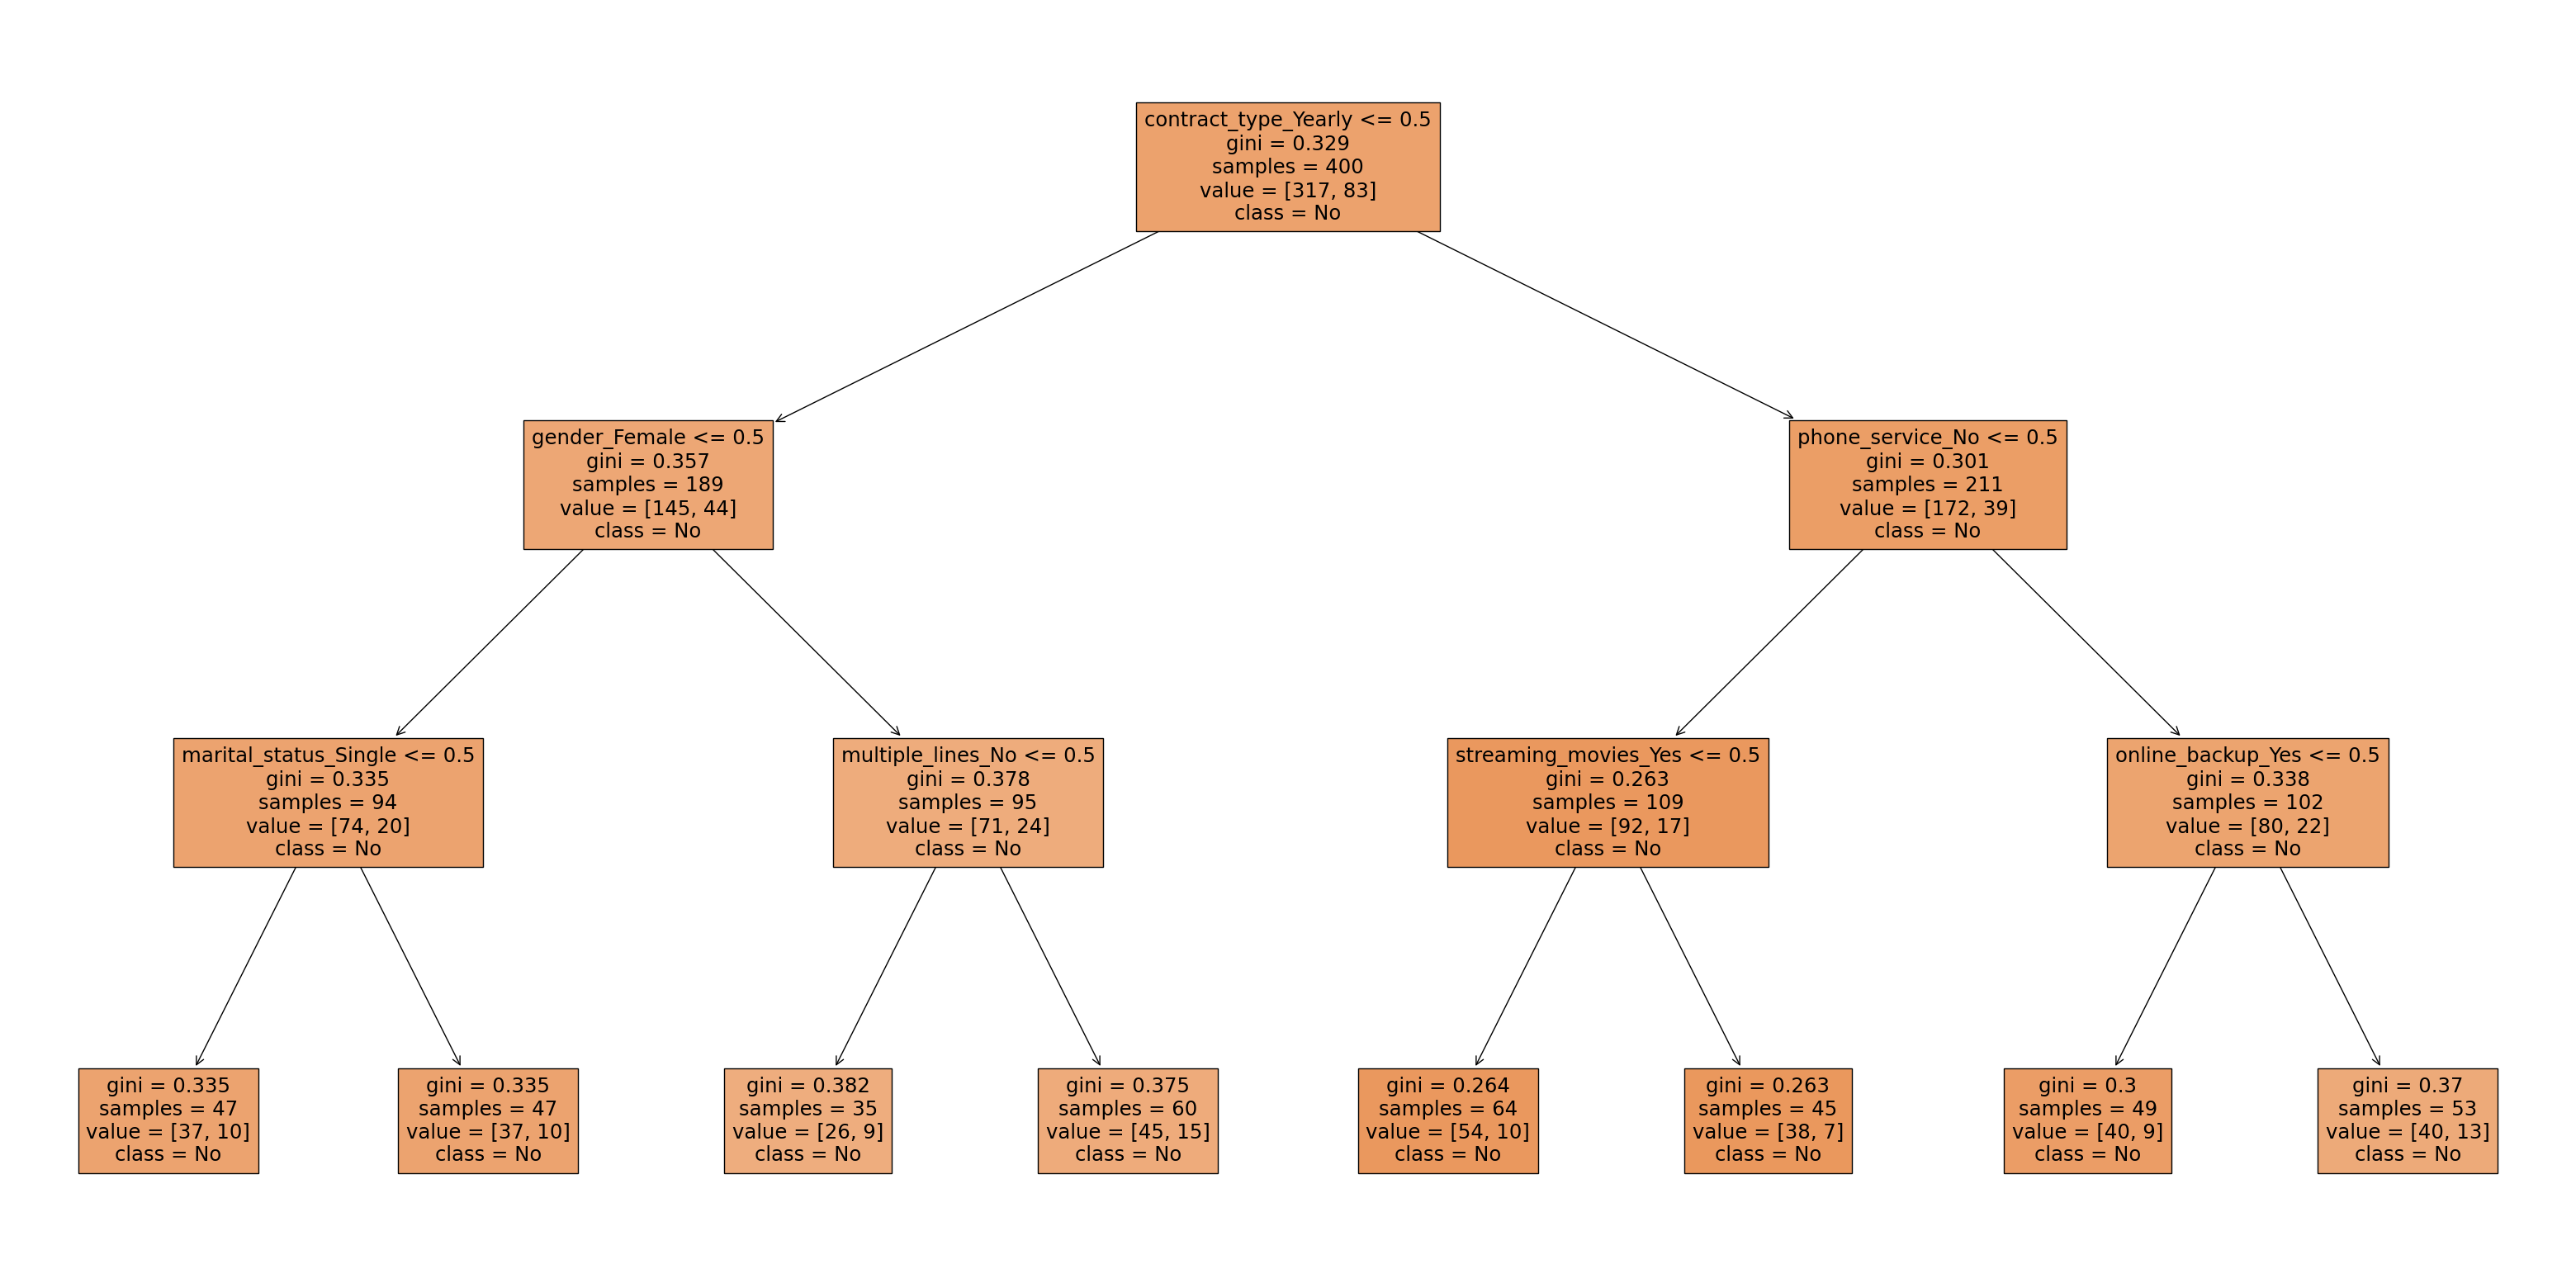

In [51]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40,20))
plot_tree(dt_best, class_names=['No','Yes'], feature_names=x_train.columns, filled=True)
plt.show

### saving the model:

In [ ]:
import joblib
joblib.dump(gnb,'decision_tree.sav')

### utilizing the model:

In [ ]:
#model=joblib.load('decision_tree.sav')

In [ ]:
#Test your model
#Gender=0
#age=30
#salary=30000

#model.predict([[Gender,age,salary]])